Dimensioni dell'array numpy: (60, 1024)
255


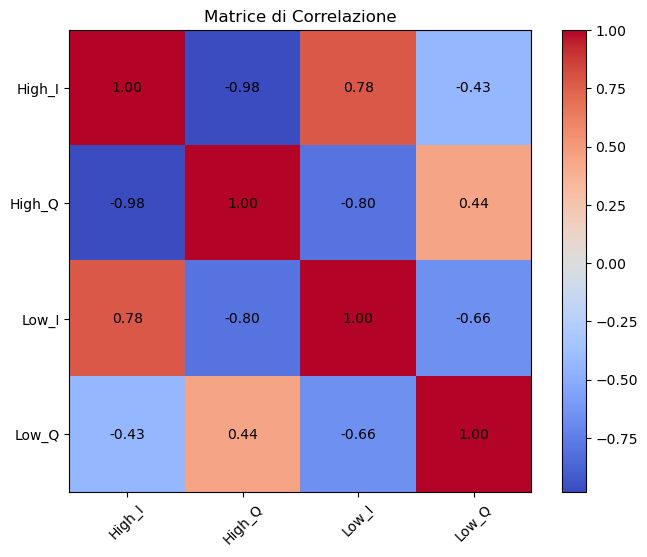

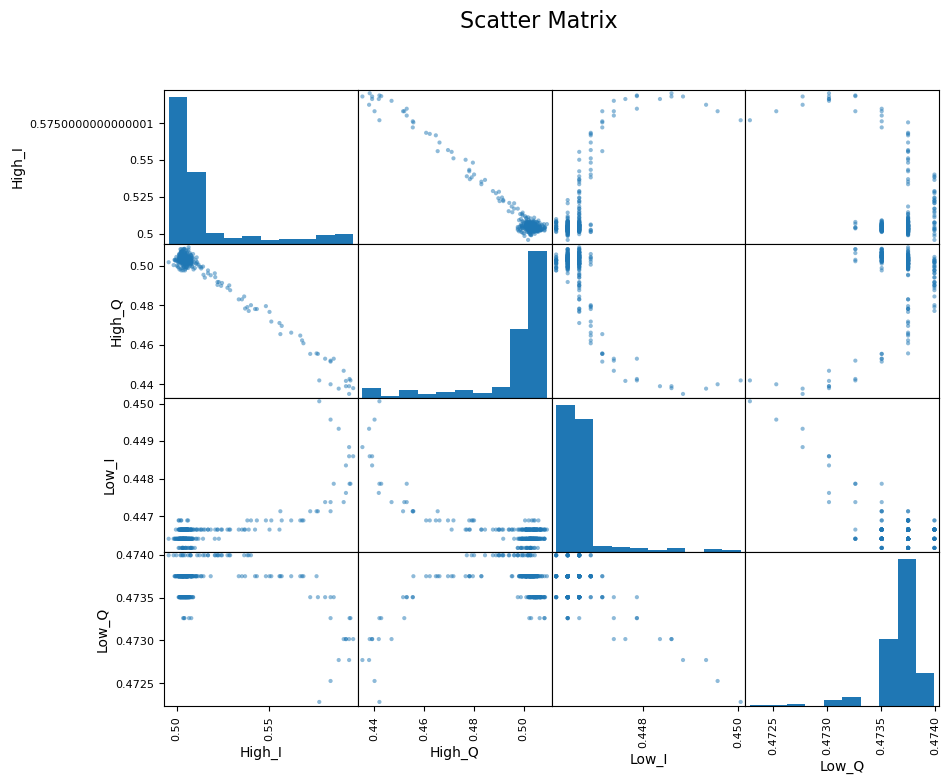

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Apre il file in modalità lettura
file_path = "Desktop/Dati/ProveVere/Sense2GoL Pulse_record_20240530-150450.raw.txt"
with open(file_path, "r") as file:
 # Inizializza una lista vuota per memorizzare i valori dei frame
    frames = []
    # Inizializza una lista vuota per memorizzare i valori di un singolo frame
    frame_values = []
    # Inizializza una variabile contatore per contare il numero di righe lette
    line_count = 0

    # Legge ogni riga del file
    for line in file:
        # Incrementa il contatore di righe
        line_count += 1
        # Ignora le righe di commento e l'intestazione
        if line.startswith('#') or line_count <= 11:
            continue
        # Rimuove eventuali spazi bianchi all'inizio e alla fine della riga
        line = line.strip()
        # Se la riga non è vuota, aggiunge il valore alla lista dei valori del frame corrente
        if line:
            frame_values.append(float(line))
            # Se sono stati letti 512 valori, aggiunge i valori del frame corrente alla lista dei frame
            if len(frame_values) == 1024:
                frames.append(frame_values)
                # Resetta la lista dei valori del frame corrente
                frame_values = []

# Converte la lista dei frame in un array numpy
frames_array = np.array(frames)

# Stampa la forma dell'array numpy per verificarne le dimensioni
print("Dimensioni dell'array numpy:", frames_array.shape)

# Estrae i dati relativi al primo frame dall'array numpy
first_frame_data = frames_array[0]

# Crea un DataFrame pandas con i dati estratti
valori_df = pd.DataFrame({
    "High_I": first_frame_data[0:255].flatten(),
    "High_Q": first_frame_data[256:511].flatten(),
    "Low_I": first_frame_data[512:767].flatten(),
    "Low_Q": first_frame_data[768:1023].flatten()
})

# Stampa il DataFrame
print(len(valori_df))

# Calcola la matrice di correlazione
correlation_matrix = valori_df.corr()

# Plotta la matrice di correlazione
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Aggiungi i numeri sulla matrice di correlazione
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title('Matrice di Correlazione')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Crea lo scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(valori_df, figsize=(10, 8))
plt.suptitle('Scatter Matrix', fontsize=16)
plt.show()